In [35]:
# occupations=Table.read_table('ses2013.csv')

In [36]:
# test_scores=Table.read_table('states_all.csv')

The objective was to generalize the gender disparity in computer-related majors relative to all majors

<h1>Importing Necessary Tools</h1>
<p>The datascience package was used for reading .csv files and creating tables holding those values</p>
<p>Numpy was included for array manipulation and basic operations</p>

In [37]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1> Reading CSV Data</h1>
<p>The 'majors_population.csv' file shows data, notably, on population of majors by gender.</p>

In [38]:
major_data=Table.read_table('majors_population.csv')
major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000
7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000
8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000
9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000
10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.19645,60000


<p>I added 'ShareMen' to complement 'ShareWomen'</p>

In [39]:
major_data=major_data.with_column('ShareMen',major_data.column('Men')/major_data.column('Total'))
major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,ShareMen
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000,0.879436
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000,0.898148
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000,0.846963
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000,0.892687
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000,0.855033
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000,0.658369
7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000,0.464286
8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000,0.880441
9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000,0.860207
10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.19645,60000,0.80355


I extracted the list of majors just for reference in 'major_list', as shown below

In [40]:
major_list=np.unique(major_data.column('Major'))
major_list

array(['AEROSPACE ENGINEERING', 'APPLIED MATHEMATICS',
       'ARCHITECTURAL ENGINEERING', 'ARCHITECTURE',
       'ASTRONOMY AND ASTROPHYSICS',
       'ATMOSPHERIC SCIENCES AND METEOROLOGY', 'BIOCHEMICAL SCIENCES',
       'BIOLOGICAL ENGINEERING', 'BIOLOGY', 'BIOMEDICAL ENGINEERING',
       'BOTANY', 'CHEMICAL ENGINEERING', 'CHEMISTRY', 'CIVIL ENGINEERING',
       'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
       'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
       'COMMUNICATION TECHNOLOGIES', 'COMMUNITY AND PUBLIC HEALTH',
       'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY',
       'COMPUTER AND INFORMATION SYSTEMS', 'COMPUTER ENGINEERING',
       'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
       'COMPUTER PROGRAMMING AND DATA PROCESSING', 'COMPUTER SCIENCE',
       'ECOLOGY', 'ELECTRICAL ENGINEERING',
       'ELECTRICAL ENGINEERING TECHNOLOGY',
       'ENGINEERING AND INDUSTRIAL MANAGEMENT',
       'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
       'ENGINEERING TECHNOLOGIES'

<h1>Data Selection</h1>
<p>I selected for the majors that have the keyword "COMPUTER" in their titles to select only for majors related to computer science</p>

In [41]:
cs_major_data=major_data.where('Major',are.containing("COMPUTER"))
cs_major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,ShareMen
11,2407,COMPUTER ENGINEERING,Engineering,41542,33258,8284,0.199413,60000,0.800587
19,2102,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,0.222695,53000,0.777305
31,2100,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,36698,27392,9306,0.253583,45000,0.746417
40,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,609,500,109,0.178982,42000,0.821018
42,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,4168,3046,1122,0.269194,41300,0.730806
53,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,8066,6607,1459,0.180883,37500,0.819117
56,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics,7613,5291,2322,0.305005,36400,0.694995


<p>As shown above, searching for "COMPUTER" in the title yielded 7 majors out of 76 total majors.</p>

<h1>Data Analysis and Visualization</h1>
<p></p>

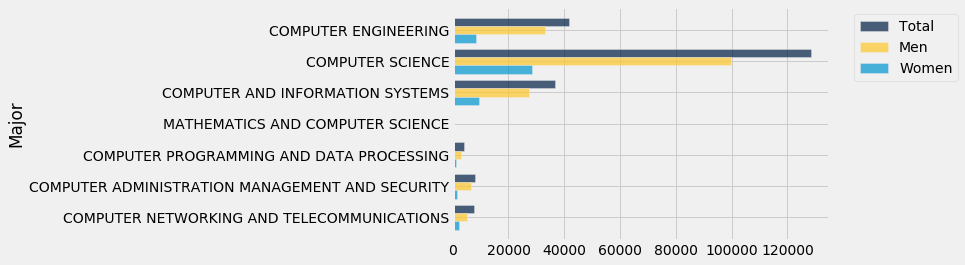

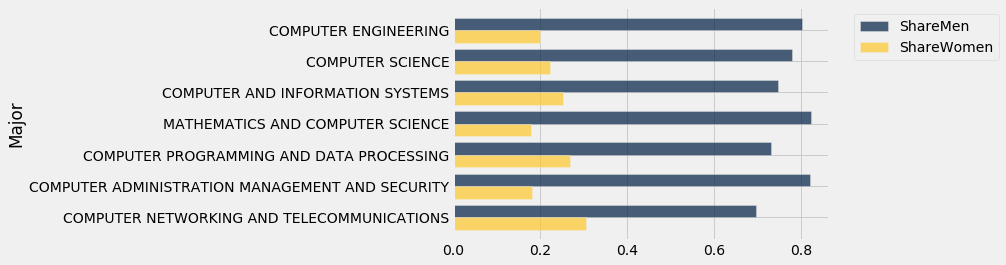

In [49]:
cs_major_data.barh('Major',make_array('Total','Men','Women'))
cs_major_data.barh('Major',make_array('ShareMen','ShareWomen'))

In [43]:
totalMen=sum(cs_major_data.column('Men'))
totalWomen=sum(cs_major_data.column('Women'))
menToWomen=totalMen/totalWomen
print("Men in computer science majors:",totalMen)
print("Women in computer science majors:",totalWomen)
print("The ratio of men to women in computer science majors:",menToWomen)

Men in computer science majors: 175837
Women in computer science majors: 51178
The ratio of men to women in computer science majors: 3.4357927234358514


<p>I sorted majors by earning to see if there was a correlation between wages and men-to-women ratios</p>
<p>A negative correlation could indicate that higher earnings encourage women to enter certain majors</p>
<p>I tested all majors and then only CS majors</p>

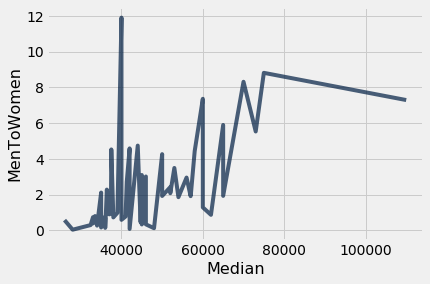

In [50]:
all_wage_and_gender_ratio=Table().with_columns('Median',major_data.column('Median'),'MenToWomen',major_data.column('Men')/major_data.column('Women'))
all_wage_and_gender_ratio.plot('Median','MenToWomen')

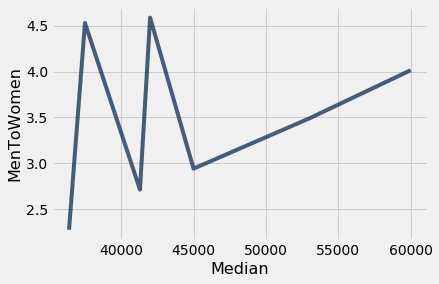

In [52]:
cs_wage_and_gender_ratio=Table().with_columns('Median',cs_major_data.column('Median'),'MenToWomen',cs_major_data.column('Men')/cs_major_data.column('Women'))
cs_wage_and_gender_ratio.plot('Median','MenToWomen')

<p>In both charts, there is a positive correlation between wages and men-to-women ratios, indicating that lower-earning majors tend to have more women and higher-earning majors tend to have more men</p>